In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Load the dataset
df = pd.read_excel('/content/drive/MyDrive/elai/othervariety.xlsx')

In [ ]:
# Convert 'Price Date' column to datetime format
df['Price Date'] = pd.to_datetime(df['Price Date'])

In [ ]:
# Set 'Price Date' column as the index
df.set_index('Price Date', inplace=True)

In [ ]:
ts_data = df[['Max Price']].copy()
ts_data = ts_data.asfreq('D')  # Set the frequency to daily
# Fill missing values using linear interpolation
ts_data = ts_data.interpolate(method='linear')
# Optionally, you can also perform backfill (use the next available value)
# for any remaining missing values at the beginning of the time series
ts_data = ts_data.bfill()
if ts_data.isnull().values.any():
  ts_data = ts_data.fillna(method='ffill') 

In [ ]:
ts_data.isnull().sum()

Max Price    0
dtype: int64

In [ ]:
ts_data.head()

Max Price
Price Date           
2010-01-05     1601.0
2010-01-06     1755.0
2010-01-07     1741.0
2010-01-08     1681.0
2010-01-09     1621.0

<Axes: xlabel='Price Date'>

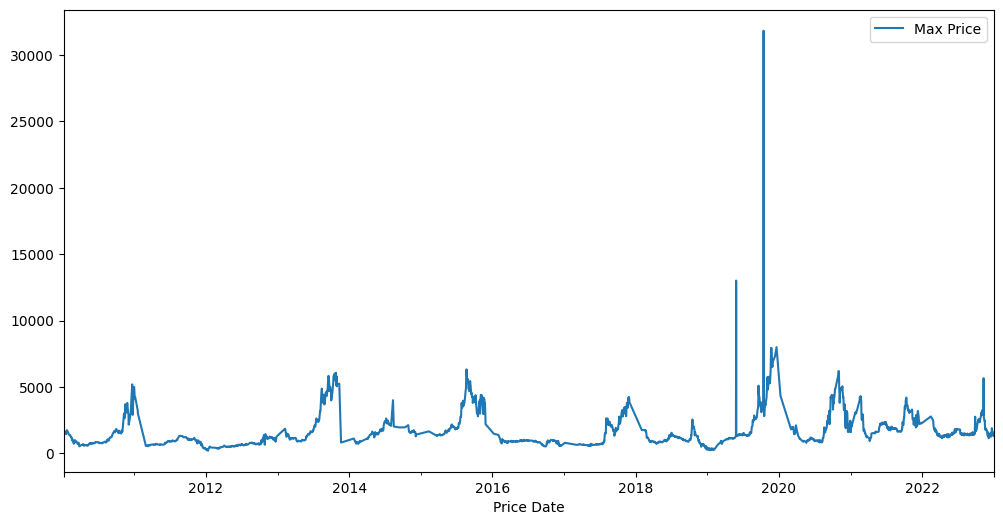

In [ ]:
ts_data.plot(figsize=(12,6))

In [ ]:
len(ts_data)

4744

In [ ]:
train = ts_data.iloc[:4714]
test = ts_data.iloc[4714:]

In [ ]:
scaler = MinMaxScaler()

In [ ]:
ts_data.head(),ts_data.tail()

(            Max Price
 Price Date           
 2010-01-05     1601.0
 2010-01-06     1755.0
 2010-01-07     1741.0
 2010-01-08     1681.0
 2010-01-09     1621.0,
             Max Price
 Price Date           
 2022-12-27     1600.5
 2022-12-28     1561.0
 2022-12-29     1540.0
 2022-12-30     1301.0
 2022-12-31     1360.0)

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_input = 30
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(generator,epochs=50)

Epoch 1/50
4684/4684 [==============================] - 76s 16ms/step - loss: 2.2870e-04
Epoch 2/50
4684/4684 [==============================] - 75s 16ms/step - loss: 2.3223e-04
Epoch 3/50
4684/4684 [==============================] - 73s 16ms/step - loss: 2.3225e-04
Epoch 4/50
4684/4684 [==============================] - 73s 16ms/step - loss: 2.2973e-04
Epoch 5/50
4684/4684 [==============================] - 75s 16ms/step - loss: 2.3064e-04
Epoch 6/50
4684/4684 [==============================] - 74s 16ms/step - loss: 2.3075e-04
Epoch 7/50
4684/4684 [==============================] - 73s 15ms/step - loss: 2.3001e-04
Epoch 8/50
4684/4684 [==============================] - 74s 16ms/step - loss: 2.2901e-04
Epoch 9/50
4684/4684 [==============================] - 73s 16ms/step - loss: 2.3232e-04
Epoch 10/50
4684/4684 [==============================] - 73s 16ms/step - loss: 2.3168e-04
Epoch 11/50
4684/4684 [==============================] - 73s 16ms/step - loss: 2.3072e-04
Epoch 12/50
4684/46

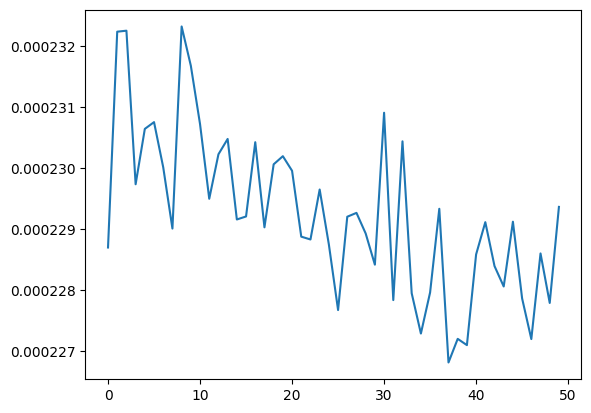

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:

last_train_batch = scaled_train[-30:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 31ms/step


array([[0.03634925]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.03781938])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 24ms/step


In [ ]:
test_predictions

[array([0.03634925], dtype=float32),
 array([0.03725141], dtype=float32),
 array([0.03811885], dtype=float32),
 array([0.03885442], dtype=float32),
 array([0.0395154], dtype=float32),
 array([0.04013883], dtype=float32),
 array([0.04074411], dtype=float32),
 array([0.04134081], dtype=float32),
 array([0.04193164], dtype=float32),
 array([0.04253033], dtype=float32),
 array([0.04312745], dtype=float32),
 array([0.04372266], dtype=float32),
 array([0.04431464], dtype=float32),
 array([0.04490319], dtype=float32),
 array([0.04548774], dtype=float32),
 array([0.04606833], dtype=float32),
 array([0.04664413], dtype=float32),
 array([0.04721387], dtype=float32),
 array([0.04777749], dtype=float32),
 array([0.04833474], dtype=float32),
 array([0.04888553], dtype=float32),
 array([0.04942983], dtype=float32),
 array([0.0499675], dtype=float32),
 array([0.05049814], dtype=float32),
 array([0.05102166], dtype=float32),
 array([0.05153805], dtype=float32),
 array([0.05208145], dtype=float32),
 ar

In [ ]:
test.head()

Max Price  Predictions
Price Date                        
2022-12-02     1397.0  1352.990732
2022-12-03     1591.0  1373.552571
2022-12-04     1441.0  1396.260646
2022-12-05     1291.0  1417.877813
2022-12-06     1141.0  1438.155497

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

<ipython-input-80-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [ ]:
test.head()

Max Price  Predictions
Price Date                        
2022-12-02     1397.0  1350.508741
2022-12-03     1591.0  1379.038445
2022-12-04     1441.0  1406.470408
2022-12-05     1291.0  1429.732302
2022-12-06     1141.0  1450.635078

<Axes: xlabel='Price Date'>

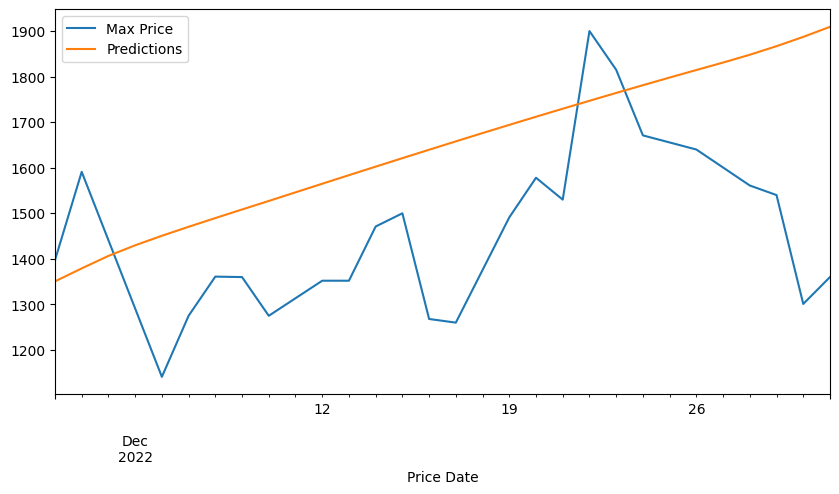

In [ ]:
test.plot(figsize=(10,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Max Price'],test['Predictions']))
print(rmse)

254.99744904246933


###BILSTM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

In [ ]:
# Load the dataset
df = pd.read_excel('/content/drive/MyDrive/elai/othervariety.xlsx')

In [ ]:
# Convert the 'Price Data' column to datetime
df['Price Date'] = pd.to_datetime(df['Price Date'])

In [ ]:
# Set the 'Price Data' column as the index
df.set_index('Price Date', inplace=True)

In [ ]:
ts_data = df[['Max Price']].copy()
ts_data = ts_data.asfreq('D')  # Set the frequency to daily
# Fill missing values using linear interpolation
ts_data = ts_data.interpolate(method='linear')
# Optionally, you can also perform backfill (use the next available value)
# for any remaining missing values at the beginning of the time series
ts_data = ts_data.bfill()
if ts_data.isnull().values.any():
  ts_data = ts_data.fillna(method='ffill') 

In [ ]:
ts_data.head()

Max Price
Price Date           
2010-01-05     1601.0
2010-01-06     1755.0
2010-01-07     1741.0
2010-01-08     1681.0
2010-01-09     1621.0

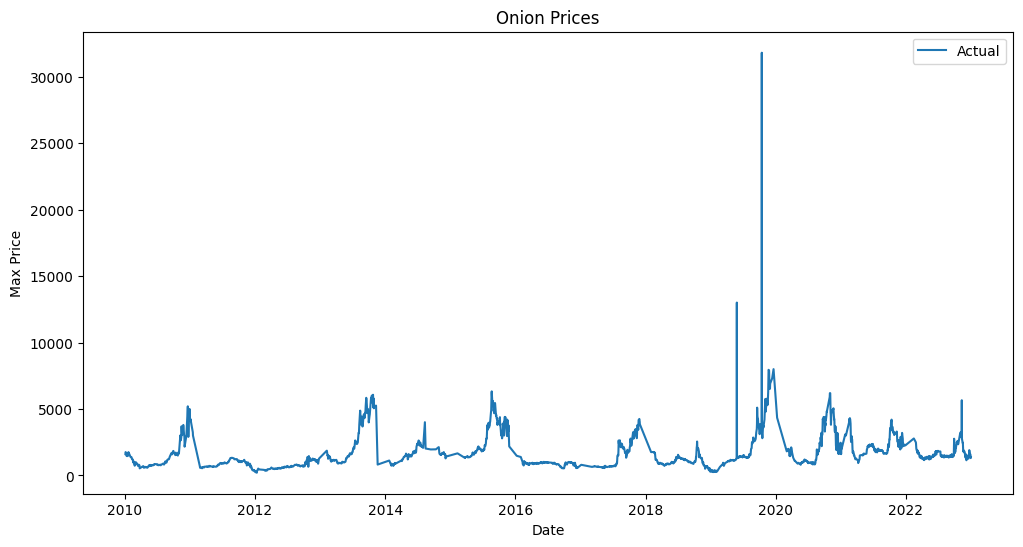

In [ ]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(ts_data.index, ts_data['Max Price'], label='Actual')
plt.xlabel('Date')
plt.ylabel('Max Price')
plt.title('Onion Prices')
plt.legend()
plt.show()

In [ ]:
# Perform seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_data['Max Price'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

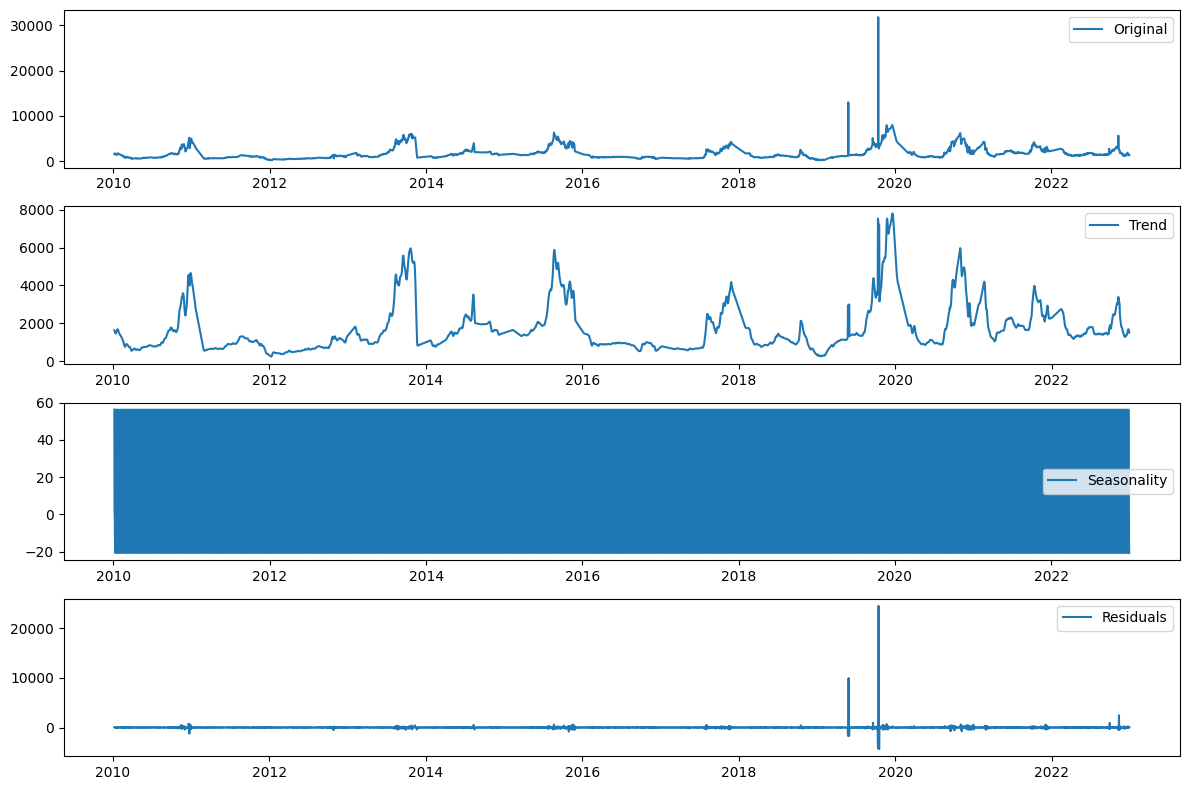

In [ ]:
# Plot the decomposition components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(ts_data.index, ts_data['Max Price'], label='Original')
plt.legend()
plt.subplot(412)
plt.plot(ts_data.index, trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(ts_data.index, seasonal, label='Seasonality')
plt.legend()
plt.subplot(414)
plt.plot(ts_data.index, residual, label='Residuals')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Test for stationarity
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

In [ ]:
# Test stationarity of the original series
test_stationarity(ts_data['Max Price'])

Results of Dickey-Fuller Test:
Test Statistic                   -4.378098
p-value                           0.000324
Lags Used                         7.000000
Number of Observations Used    4736.000000
Critical Value (1%)              -3.431732
Critical Value (5%)              -2.862150
Critical Value (10%)             -2.567095
dtype: float64


In [ ]:
# # Apply log transformation to stabilize the variance
# log_prices = np.log(ts_data['Max Price'])

In [ ]:
# # Test stationarity of the log-transformed series
# test_stationarity(log_prices)

In [ ]:
series1=ts_data['Max Price']

In [ ]:
# Create train and test sets
train_size = int(len(ts_data) * 0.9)
train_data = series1[:train_size]
test_data = series1[train_size:]

In [ ]:
len(train_data)

4269

In [ ]:
len(test_data)

475

In [ ]:
# Scale the data
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data.values.reshape(-1, 1))

In [ ]:
# Define the number of time steps and create input sequences
n_steps = 30
X_train = []
y_train = []
for i in range(n_steps, len(scaled_train_data)):
    X_train.append(scaled_train_data[i - n_steps:i, 0])
    y_train.append(scaled_train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshape input sequences for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Build the BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True, input_shape=(n_steps, 1))))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
133/133 [==============================] - 19s 74ms/step - loss: 5.0219e-04
Epoch 2/50
133/133 [==============================] - 10s 74ms/step - loss: 3.4420e-04
Epoch 3/50
133/133 [==============================] - 8s 58ms/step - loss: 3.2162e-04
Epoch 4/50
133/133 [==============================] - 10s 79ms/step - loss: 3.2608e-04
Epoch 5/50
133/133 [==============================] - 9s 65ms/step - loss: 3.1725e-04
Epoch 6/50
133/133 [==============================] - 9s 66ms/step - loss: 3.3172e-04
Epoch 7/50
133/133 [==============================] - 10s 74ms/step - loss: 3.1335e-04
Epoch 8/50
133/133 [==============================] - 8s 57ms/step - loss: 3.0432e-04
Epoch 9/50
133/133 [==============================] - 10s 74ms/step - loss: 3.0978e-04
Epoch 10/50
133/133 [==============================] - 9s 69ms/step - loss: 3.0654e-04
Epoch 11/50
133/133 [==============================] - 8s 62ms/step - loss: 3.0242e-04
Epoch 12/50
133/133 [==========================

In [ ]:
# Prepare test data
scaled_test_data = scaler.transform(test_data.values.reshape(-1, 1))
X_test = []
y_test = []
for i in range(n_steps, len(scaled_test_data)):
    X_test.append(scaled_test_data[i - n_steps:i, 0])
    y_test.append(scaled_test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Generate predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

14/14 [==============================] - 5s 46ms/step


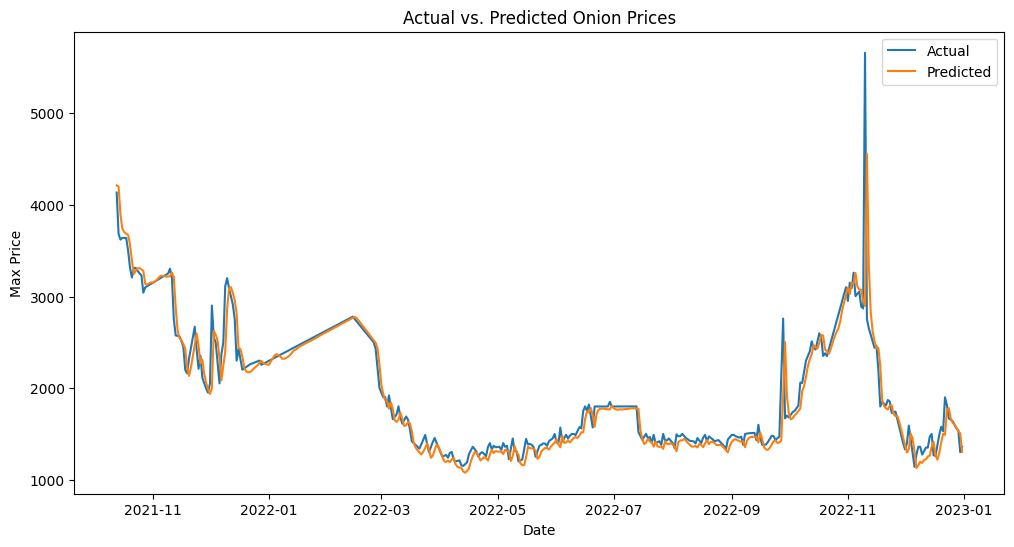

In [ ]:
# Plot test vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(ts_data.index[train_size + n_steps:train_size + n_steps + len(predicted_prices)], ts_data['Max Price'][train_size + n_steps:train_size + n_steps + len(predicted_prices)], label='Actual')
plt.plot(ts_data.index[train_size + n_steps:train_size + n_steps + len(predicted_prices)], predicted_prices[:, 0], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Max Price')
plt.title('Actual vs. Predicted Onion Prices')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE
mae = mean_absolute_error(ts_data['Max Price'][train_size + n_steps:train_size + n_steps + len(predicted_prices)], predicted_prices[:, 0])
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(ts_data['Max Price'][train_size + n_steps:train_size + n_steps + len(predicted_prices)], predicted_prices[:, 0]))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(ts_data['Max Price'][train_size + n_steps:train_size + n_steps + len(predicted_prices)], predicted_prices[:, 0])
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Absolute Error (MAE): 96.52448474441128
Root Mean Squared Error (RMSE): 211.0838866142217
Mean Absolute Percentage Error (MAPE): 4.827301746053507%


148/148 [==============================] - 3s 17ms/step


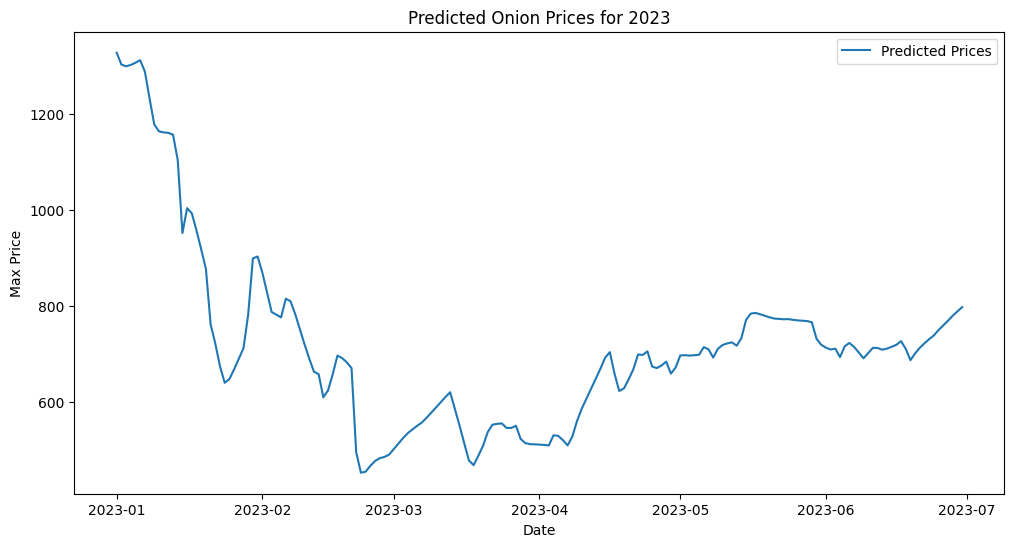

In [ ]:
# Prepare the input data for predicting 2023 prices
start_date_2023 = pd.to_datetime('2023-01-01')
end_date_2023 = pd.to_datetime('2023-06-30')
dates_2023 = pd.date_range(start=start_date_2023, end=end_date_2023, freq='D')

# Scale the input data
scaled_2023 = scaler.transform(ts_data['Max Price'].values.reshape(-1, 1))

# Reshape the input data to match the BiLSTM model's input shape
X_2023 = []
for i in range(n_steps, len(scaled_2023)):
    X_2023.append(scaled_2023[i - n_steps:i, 0])
X_2023 = np.array(X_2023)

# Predict the onion prices for 2023
predicted_prices = model.predict(X_2023.reshape(X_2023.shape[0], X_2023.shape[1], 1))

# Inverse scale the predicted prices
predicted_prices_2023 = scaler.inverse_transform(predicted_prices)

# Truncate the predicted prices array to match the length of dates_2023
predicted_prices_2023 = predicted_prices_2023[:len(dates_2023)]

# Create a DataFrame for the predicted prices
df_predicted_2023 = pd.DataFrame(data=predicted_prices_2023, index=dates_2023, columns=['Predicted Prices'])

# Plot the predicted prices for 2023
plt.figure(figsize=(12, 6))
plt.plot(df_predicted_2023.index, df_predicted_2023['Predicted Prices'], label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Max Price')
plt.title('Predicted Onion Prices for 2023')
plt.legend()
plt.show()


In [ ]:
df_predicted_2023

Predicted Prices
2023-01-01       1326.355713
2023-01-02       1301.820801
2023-01-03       1298.203735
2023-01-04       1300.961792
2023-01-05       1305.495850
...                      ...
2023-06-26        759.852295
2023-06-27        769.566650
2023-06-28        779.898132
2023-06-29        788.812073
2023-06-30        797.714844

[181 rows x 1 columns]